#Rents in Berlin

The guys of the Berliner Morgenpost made [this nice interactive data viz](http://www.morgenpost.de/interaktiv/mieten/article136875377/So-stark-steigen-die-Mieten-in-Berlins-Kiezen.html?config=interactive). They also published the [data](https://docs.google.com/spreadsheets/d/1x77-onfnmmbSf7xMQf4H-Ak4ushbG-GzKyTd6_8h0nQ/edit?usp=sharing), so we can play with it. Let's do!  

offer = units per zip code

rent = price in Euro per square meter (Median)

size = average size in square meter

year = year of data (2009-14)

zip = zip code

In [1]:
# That's the way we import and open a csv file in IPython Notebook

import csv
file = open("/Users/vanessawormer/desktop/lede/berlin-rent.csv")
rents = list(csv.DictReader(file))

Unfortunately the integers are defined to be strings (""). I want to do some calculations so I have to convert them into real integers.

That's one way I can do this (maybe you know an easier way?):

In [2]:
# I convert the strings into integers

for row in rents:
    if row["size"] != "":
        row["size"] = int(row["size"])
    if row["year"] != "":
        row["year"] = int(row["year"])
    if row["zip"] != "":
        row["zip"] = int(row["zip"])
    if row["rent"] != "":
        row["rent"] = float(row["rent"])
    if row["offer"] != "":
        row["offer"] = int(row["offer"])


In [13]:
# or like this:

# rent = [float(rent["rent"]) for rent in rents if rent["rent"] != ""]

I'm pretty sure that I want to compare the data of each year (2009 - 2014). So I make for each year a new list of dictionaries.

In [3]:
rent2009 = [rent for rent in rents if rent["year"]==2009]
rent2010 = [rent for rent in rents if rent["year"]==2010]
rent2011 = [rent for rent in rents if rent["year"]==2011]
rent2012 = [rent for rent in rents if rent["year"]==2012]
rent2013 = [rent for rent in rents if rent["year"]==2013]
rent2014 = [rent for rent in rents if rent["year"]==2014]

rent2009

change = []

for r14 in rent2014:
    for r13 in rent2013:
        if r13["zip"]==r14["zip"]:
            if r14["rent"] !="" and r13["rent"] != "":
                dif = r14["rent"] - r13["rent"]
                r14["change13-14"] = dif
                change.append(r14)
                

            

In [50]:
print "change",len(change)
print "original 2014",len(rent2014)

negatives = []
for c in change: 
    if c["change13-14"] < 0:
       negatives.append(c)
len(negatives)



change 187
original 2014 190


16

## So, finally I cleaned my dataset and now we can do some fancy calculations! Hooray!

In [12]:
# Let's import numpy - numpy is a fundamental package for scientific computing with Python

import numpy as np

In [22]:
prices = [float(rent["rent"]) for rent in rents if rent["rent"]!= ""]

prices
np.median(prices)

7.0

In [31]:
np.std(rent)

1.6442571161989961

In [16]:
np.median(rent)

7.0

In [22]:
# matplotlib
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

(array([   2.,    0.,    0.,   88.,  343.,  341.,  217.,   87.,   42.,   10.]),
 array([  0.   ,   1.311,   2.622,   3.933,   5.244,   6.555,   7.866,
          9.177,  10.488,  11.799,  13.11 ]),
 <a list of 10 Patch objects>)

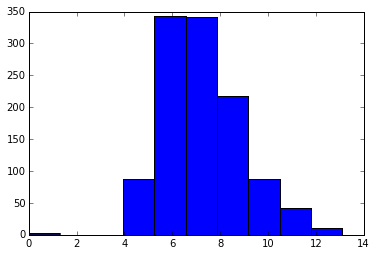

In [28]:
plt.hist(rent)

{'boxes': [<matplotlib.lines.Line2D at 0x106bcfe50>],
 'caps': [<matplotlib.lines.Line2D at 0x106bdedd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x106bf6110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x106be9a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x106bde0d0>,
  <matplotlib.lines.Line2D at 0x106bde790>]}

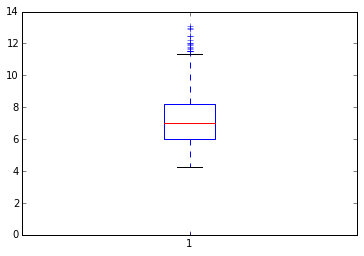

In [29]:
plt.boxplot(rent)

In [19]:
x = rents[rent]
y = rents[zip]
plt.scatter(x,y)

TypeError: list indices must be integers, not list